In [2]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader= ArgoDataFetcher()


/home/alberta/miniconda2/envs/seawater/lib/python3.6/site-packages/argopy/plotters.py:41: UserWarning: argopy requires seaborn installed for full plotting functionality
  warnings.warn("argopy requires seaborn installed for full plotting functionality")


In [3]:
%%time
ds=argo_loader.region([-5.68308401,9.59771824,34.84750366,45.13545609,0,12000,'2010-02-05','2010-03-06']).to_xarray()

CPU times: user 396 ms, sys: 4 ms, total: 400 ms
Wall time: 765 ms


In [4]:
print(ds)

<xarray.Dataset>
Dimensions:          (N_POINTS: 4256)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2010-02-05T00:05:00 ... 2010-03-05T23:40:00
    LONGITUDE        (N_POINTS) float64 7.089 7.089 7.089 ... 1.264 1.264 1.264
    LATITUDE         (N_POINTS) float64 40.63 40.63 40.63 ... 38.22 38.22 38.22
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 ... 4251 4252 4253 4254 4255
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 74 74 74 74 74 74 74 ... 77 77 77 77 77 77
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6900504 6900504 ... 6900501 6900501
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 16.0 26.0 36.0 ... 1.489e+03 1.502e+03
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) 

In [48]:
ds_profiles=ds.argo.point2profile()
print(ds_profiles)

<xarray.Dataset>
Dimensions:          (N_LEVELS: 154, N_PROF: 44)
Coordinates:
    LONGITUDE        (N_PROF) float64 7.089 4.369 4.181 ... 3.097 4.024 1.264
    TIME             (N_PROF) datetime64[ns] 2010-02-05T00:05:00 ... 2010-03-05T23:40:00
  * N_PROF           (N_PROF) int64 23 18 37 26 6 20 10 7 ... 14 9 36 31 1 42 17
    LATITUDE         (N_PROF) float64 40.63 41.47 40.83 ... 40.05 40.74 38.22
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 ... 148 149 150 151 152 153
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 74 74 70 140 141 74 ... 154 66 145 146 75 77
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'D' ... 'A' 'A' 'D' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6900504 6900502 6900700 ... 6900700 6900501
    POSITION_QC      (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float64 16.0 26.0 36.0 ... nan nan nan
    PRES_QC          (N

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import numpy as np

In [49]:
all_lat=np.array(ds_profiles['LATITUDE'].values)
all_lon=np.array(ds_profiles['LONGITUDE'].values)
print(len(all_lat))

44


In [50]:
def map_profiles_from_jsonfile(all_lat,all_lon):
    


    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
#    ax.set_extent((-7,10,33,46))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.scatter(all_lon, all_lat);
    plt.title('ARGO profiles from argopy', size=20);


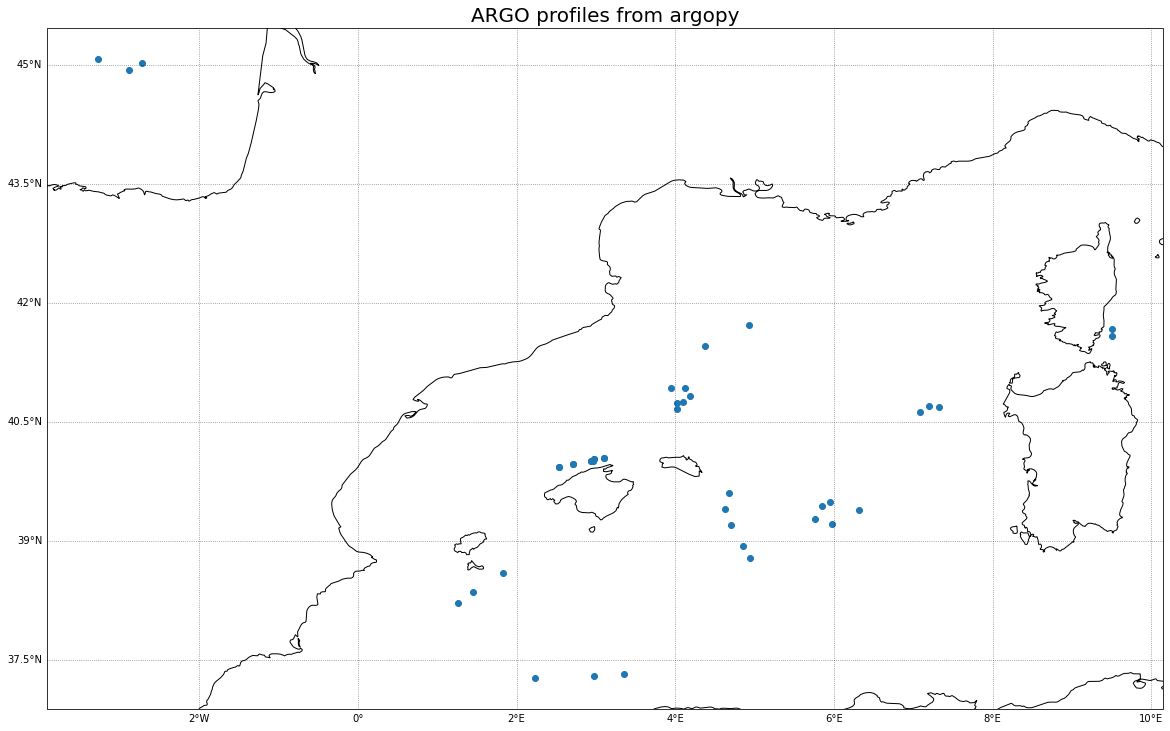

In [51]:
map_profiles_from_jsonfile(all_lat,all_lon)

In [40]:
nodup_lat=[]
nodup_lon=[]
for l in range(len(all_lat)):
    if not (all_lat[l] in nodup_lat and all_lon[l] in nodup_lon):
        nodup_lat.append(all_lat[l])
        nodup_lon.append(all_lon[l])  
    else:
        print('there is a dup',l)

there is a dup 1
there is a dup 2
there is a dup 3
there is a dup 4
there is a dup 5
there is a dup 6
there is a dup 7
there is a dup 8
there is a dup 9
there is a dup 10
there is a dup 11
there is a dup 12
there is a dup 13
there is a dup 14
there is a dup 15
there is a dup 16
there is a dup 17
there is a dup 18
there is a dup 19
there is a dup 20
there is a dup 21
there is a dup 22
there is a dup 23
there is a dup 24
there is a dup 25
there is a dup 26
there is a dup 27
there is a dup 28
there is a dup 29
there is a dup 30
there is a dup 31
there is a dup 32
there is a dup 33
there is a dup 34
there is a dup 35
there is a dup 36
there is a dup 37
there is a dup 38
there is a dup 39
there is a dup 40
there is a dup 41
there is a dup 42
there is a dup 43
there is a dup 44
there is a dup 45
there is a dup 46
there is a dup 47
there is a dup 48
there is a dup 49
there is a dup 50
there is a dup 51
there is a dup 52
there is a dup 53
there is a dup 54
there is a dup 55
there is a dup 56
t

there is a dup 933
there is a dup 934
there is a dup 935
there is a dup 936
there is a dup 937
there is a dup 938
there is a dup 939
there is a dup 940
there is a dup 941
there is a dup 942
there is a dup 943
there is a dup 944
there is a dup 945
there is a dup 946
there is a dup 947
there is a dup 948
there is a dup 949
there is a dup 950
there is a dup 951
there is a dup 952
there is a dup 953
there is a dup 954
there is a dup 955
there is a dup 956
there is a dup 957
there is a dup 958
there is a dup 959
there is a dup 960
there is a dup 961
there is a dup 962
there is a dup 963
there is a dup 964
there is a dup 965
there is a dup 966
there is a dup 967
there is a dup 968
there is a dup 969
there is a dup 970
there is a dup 971
there is a dup 972
there is a dup 973
there is a dup 974
there is a dup 975
there is a dup 976
there is a dup 977
there is a dup 978
there is a dup 979
there is a dup 980
there is a dup 981
there is a dup 982
there is a dup 983
there is a dup 984
there is a d

there is a dup 2173
there is a dup 2174
there is a dup 2175
there is a dup 2176
there is a dup 2177
there is a dup 2178
there is a dup 2179
there is a dup 2180
there is a dup 2181
there is a dup 2182
there is a dup 2183
there is a dup 2184
there is a dup 2185
there is a dup 2186
there is a dup 2187
there is a dup 2188
there is a dup 2189
there is a dup 2190
there is a dup 2191
there is a dup 2192
there is a dup 2193
there is a dup 2194
there is a dup 2195
there is a dup 2196
there is a dup 2197
there is a dup 2198
there is a dup 2199
there is a dup 2200
there is a dup 2201
there is a dup 2202
there is a dup 2203
there is a dup 2204
there is a dup 2205
there is a dup 2206
there is a dup 2207
there is a dup 2208
there is a dup 2209
there is a dup 2210
there is a dup 2211
there is a dup 2212
there is a dup 2213
there is a dup 2214
there is a dup 2216
there is a dup 2217
there is a dup 2218
there is a dup 2219
there is a dup 2220
there is a dup 2221
there is a dup 2222
there is a dup 2223


there is a dup 3479
there is a dup 3480
there is a dup 3481
there is a dup 3482
there is a dup 3483
there is a dup 3484
there is a dup 3485
there is a dup 3486
there is a dup 3487
there is a dup 3488
there is a dup 3489
there is a dup 3490
there is a dup 3491
there is a dup 3492
there is a dup 3493
there is a dup 3494
there is a dup 3495
there is a dup 3496
there is a dup 3497
there is a dup 3498
there is a dup 3499
there is a dup 3500
there is a dup 3501
there is a dup 3502
there is a dup 3503
there is a dup 3504
there is a dup 3505
there is a dup 3506
there is a dup 3507
there is a dup 3508
there is a dup 3509
there is a dup 3510
there is a dup 3511
there is a dup 3512
there is a dup 3513
there is a dup 3514
there is a dup 3515
there is a dup 3516
there is a dup 3517
there is a dup 3518
there is a dup 3519
there is a dup 3520
there is a dup 3521
there is a dup 3522
there is a dup 3523
there is a dup 3524
there is a dup 3525
there is a dup 3526
there is a dup 3527
there is a dup 3528


In [39]:
len(nodup_lat)

38

In [41]:
print(all_lat[0],all_lat[1])

40.632 40.632


In [42]:
print(all_lon[0],all_lon[1])

7.089 7.089


In [44]:
print(ds.TIME[0].values,ds.TIME[1].values)

2010-02-05T00:05:00.000000000 2010-02-05T00:05:00.000000000


In [45]:
print(ds.CYCLE_NUMBER[0].values,ds.CYCLE_NUMBER[1].values)

74 74


In [46]:
print(ds.PRES[0].values,ds.PRES[1].values)

16.0 26.0
